In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
np.random.seed(1234)
import pymc
import scipy.stats as stats

## Estimating parameters of an ideal flash method response

In [42]:
def mu1(a, b, c, x): # One dimensional ideal model (an instantaneous heat pulse, no heat losses)
    suma =0.0
    for n in range(1, 50):
        suma = suma + (-1)**n*np.exp(-((n*np.pi)**2*a*x))
    bp=(x>0)
    return bp*b*(1+2.0*suma)+c

In [50]:
# observed data
n = 50
a = 0.5
b = 2.0
c = 0.0
sigma = 0.02
x = np.linspace(0.01, 1.5, n)
y_obs = mu1(a, b, c, x) + np.random.normal(0, sigma, n)
data = pd.DataFrame(np.array([x, y_obs]).T, columns=['x', 'y'])

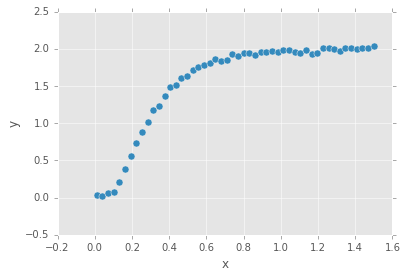

In [51]:
data.plot(x='x', y='y', kind='scatter', s=50);

In [56]:
# define priors
a = pymc.Normal('alpha', mu=0.1, tau=2/10**0)
b = pymc.Normal('tmax', mu=1, tau=2.0/10**0)
c = pymc.Normal('baseline', mu=0, tau=0.01/10**0)
tau = pymc.Gamma("tau", alpha=0.8, beta=0.8)

# define likelihood
@pymc.deterministic
def mu(a=a, b=b, c=c, x=x):
    suma =0.0
    for n in range(1, 50):
        suma = suma + (-1)**n*np.exp(-((n*np.pi)**2*a*x))
   
    return b*(1+2.0*suma)+c
    
y = pymc.Normal('y', mu=mu, tau=tau, value=y_obs, observed=True)

# inference
m = pymc.Model([a, b, c, tau, x, y])
mc = pymc.MCMC(m)
mc.sample(iter=11000, burn=10000)

 [-----------------100%-----------------] 11000 of 11000 complete in 22.6 sec

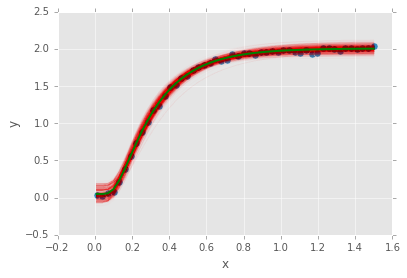

In [57]:
abar = a.stats()['mean']
bbar = b.stats()['mean']
cbar = c.stats()['mean']
data.plot(x='x', y='y', kind='scatter', s=50);
xp = np.array(x)  #[x.min(), x.max()])
plt.plot(xp, mu1(a.trace(), b.trace(), c.trace(), xp[:, None]), c='red', alpha=0.01)
plt.plot(xp, mu1(abar,bbar,cbar,xp), linewidth=2, c='green');

Plotting tmax
Plotting baseline
Plotting tau
Plotting alpha


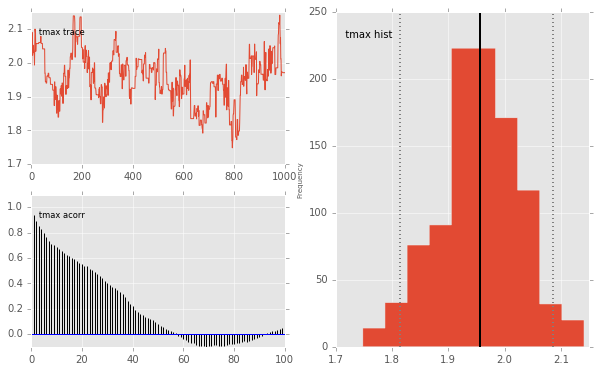

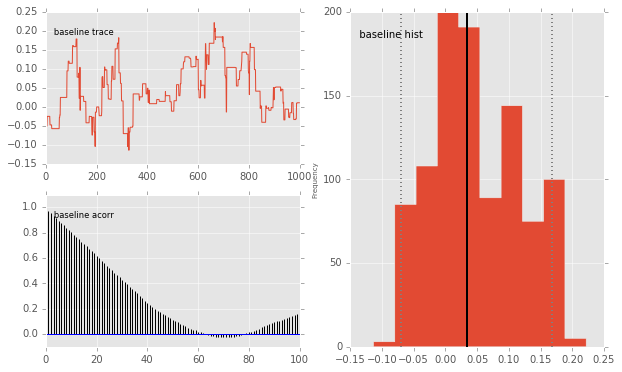

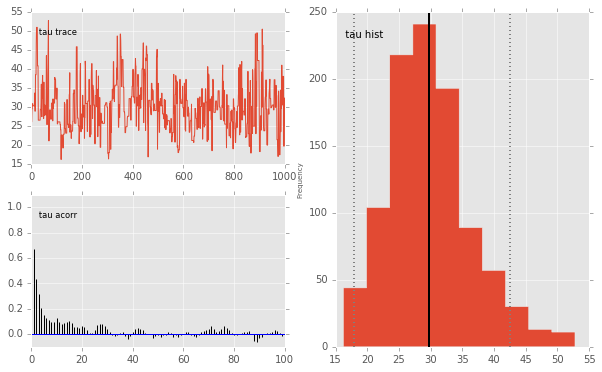

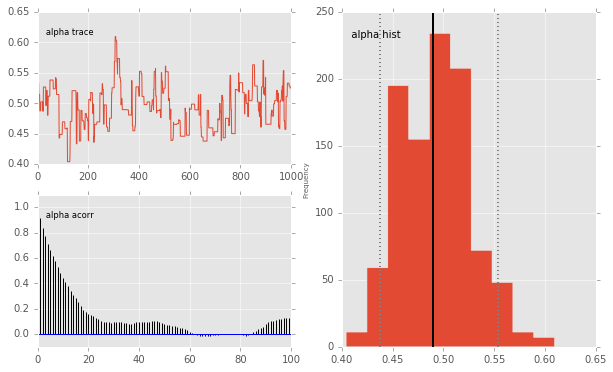

In [58]:
pymc.Matplot.plot(mc, )

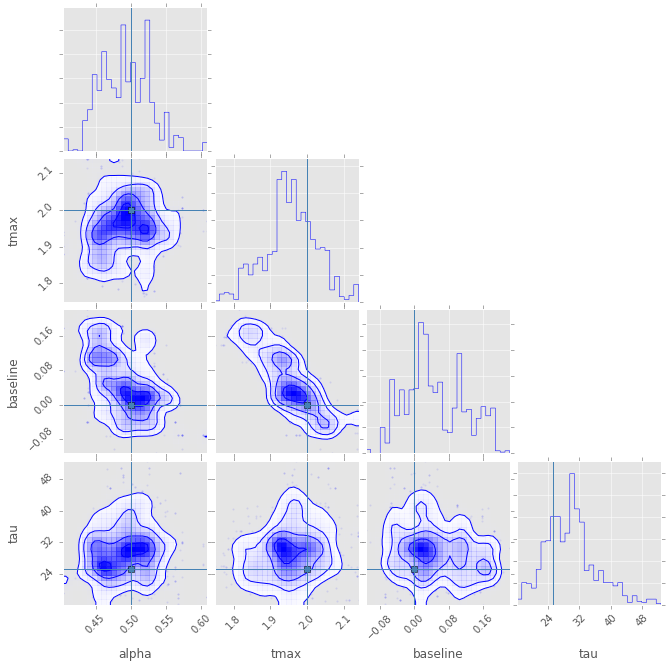

In [59]:

import numpy as np
samples = np.array([a.trace(),b.trace(), c.trace(), tau.trace()]).T
# pip install corner or pip install triangle_plot
import corner
figure = corner.corner(samples, color="b", bins=30, filled= True, smooth=(1.5),fill_contours=False,
                       labels=['alpha','tmax','baseline', 'tau'], 
                truths=[0.5, 2.0, 0.0, tau])

In [49]:
#abar = a.stats()['mean']
#bbar = b.stats()['mean']
abar, bbar, cbar

(0.4982, 1.9565, 0.0303)